In [1]:
import json, csv, gzip
import pandas as pd
from collections import defaultdict
from collections import Counter

In [2]:
high_auths = pd.read_csv('./high.csv', header=0)
high_authors = set(high_auths['author'].tolist())

low_auths = pd.read_csv('./low.csv', header=0)
low_authors = set(low_auths['author'].tolist())


### Read first CSV to initiate dictionaries

In [3]:
frame1 = pd.read_csv('./ties/2016_01.csv', header=None, names=['author', 'subreddit', 'name', 'parent_id'])
frame = frame1.loc[frame1['author']!='AutoModerator']
nameset = set(frame['name'].tolist())
parentset = set(frame['parent_id'].tolist())
ids = nameset.intersection(parentset)
Fcomments = frame[['author', 'name']]
Frelation = frame[['name', 'parent_id']]
comments = Fcomments.set_index('name').to_dict()['author']
relation = Frelation.set_index('parent_id').to_dict()['name']
#parent = Fparent.set_index('name').to_dict()['author']

#testcell
d = {1: "one", 2: "three"}
d1 = {3: "two"}

# updates the value of key 2
d.update(d1)
print(d)

d1 = {3: "three"}

# adds element with key 3
d.update(d1)
print(d)

#### Read CSV as pandas

In [4]:
#comments = dict()
#relation = dict()

years = [2016]
for year in years:
    for month in range(2,13):
        print "Dictionary sizes: ", len(comments), len(relation)
        fname = './ties/' + str(year) + '_' + str('{:02d}'.format(month)) + '.csv'
        frame1 = pd.read_csv(fname, header=None, names=['author', 'subreddit', 'name', 'parent_id'])
        frame = frame1.loc[frame1['author']!='AutoModerator']
        nameset = set(frame['name'].tolist())
        parentset = set(frame['parent_id'].tolist())

        ids = ids.union(nameset.intersection(parentset))
        Fcomments = frame[['author', 'name']]
        Frelation = frame[['name', 'parent_id']]
        comments.update(Fcomments.set_index('name').to_dict()['author'])
        relation.update(Frelation.set_index('parent_id').to_dict()['name'])
        


Dictionary sizes:  367166 327819
Dictionary sizes:  681224 608739
Dictionary sizes:  995899 890565
Dictionary sizes:  1302516 1165255
Dictionary sizes:  1602691 1433832
Dictionary sizes:  1912384 1712754
Dictionary sizes:  2297993 2060240
Dictionary sizes:  2760972 2468101
Dictionary sizes:  3250439 2899131
Dictionary sizes:  3877674 3440326
Dictionary sizes:  4680504 4121558


In [5]:
years = [2017]
for year in years:
    for month in range(1,13):
        print "Dictionary sizes: ", len(comments), len(relation)
        fname = './ties/' + str(year) + '_' + str('{:02d}'.format(month)) + '.csv'
        frame1 = pd.read_csv(fname, header=None, names=['author', 'subreddit', 'name', 'parent_id'])
        frame = frame1.loc[frame1['author']!='AutoModerator']
        nameset = set(frame['name'].tolist())
        parentset = set(frame['parent_id'].tolist())
        ids = ids.union(nameset.intersection(parentset))
        #ids = nameset.intersection(parentset)
        Fcomments = frame[['author', 'name']]
        Frelation = frame[['name', 'parent_id']]
        comments.update(Fcomments.set_index('name').to_dict()['author'])
        relation.update(Frelation.set_index('parent_id').to_dict()['name'])


Dictionary sizes:  5646736 4925025
Dictionary sizes:  6686796 5804848
Dictionary sizes:  7837350 6770010
Dictionary sizes:  8854297 7612693
Dictionary sizes:  9834377 8435969
Dictionary sizes:  10815811 9264346
Dictionary sizes:  11863538 10137755
Dictionary sizes:  12913986 11031139
Dictionary sizes:  13479839 11556235
Dictionary sizes:  14765500 12616296
Dictionary sizes:  16010966 13696333
Dictionary sizes:  17338485 14805090


In [6]:
import networkx as nx
D = nx.DiGraph()

In [7]:
#ids = comments.keys()

In [42]:
edgelist = []
for interaction_id in ids:
    replier = comments[interaction_id]
    author = comments[relation[interaction_id]]
    #edgelist.append((author, replier))
    if replier in high_authors or author in high_authors:
        D.add_edge(replier, author, color='red')
    elif replier in low_authors or author in low_authors:
        D.add_edge(replier, author, color='green')
    else:
        D.add_edge(replier, author, color='blue')
        
    #print author, ', ', replier

#H = nx.DiGraph(G)
from networkx.drawing.nx_agraph import graphviz_layout
import holoviews as hv

#hv.extension('bokeh')

#%opts Graph [width=1000 height=1000]
'''
a_names = list(G.nodes)
#G.nodes[a_names[0]]['color'] = 'blue'

for name in a_names:
    if name in high_authors:
        G.nodes[name]['color'] = 'blue'
        #print "high"
    elif name in low_authors:
        G.nodes[name]['color'] = 'green'
    else:
        G.nodes[name]['color'] = 'red'
        G.nodes[name]['alpha'] = 1
        G.nodes[name]['size'] = 1
        
color_map = []
Gnodes = list(G.nodes)
for i in range(len(Gnodes)):
    if Gnodes[i] in high_authors:
        
        G.nodes[i]['color'] = 'blue'
    elif Gnodes[i] in low_authors:
        #n = G.get_node(node)
        G.nodes[i]['color'] = 'green'
    else:
        #n = G.get_node(node)
        G.nodes[i]['color'] = 'grey'

'''


'''
'''
padding = dict(x=(-1.2, 1.2), y=(-1.2, 1.2))

hv.Graph.from_networkx(D, nx.layout.random_layout)#.redim.range(**padding)


%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(1,figsize=(100,100)) 
#%matplotlib
nx.draw(D,with_labels = True, node_size=10,font_size=6, alpha=0.6)
#plt.show()

### Network Algorithms

In [44]:
from networkx.algorithms.reciprocity import reciprocity

In [45]:
high_network = set(high_authors).union(set(D.nodes).difference(set(low_authors)))
low_network = set(low_authors).union(set(D.nodes).difference(set(high_authors)))

In [46]:
high_recp = reciprocity(D, high_network)

In [47]:
low_recp = reciprocity(D, low_network)

In [48]:
h_recp = []
l_recp = []
for author in high_authors:
    try:
        h_recp.append(high_recp[author])
    except:
        pass

for author in low_authors:
    try:
        l_recp.append(low_recp[author])
    except:
        pass
    

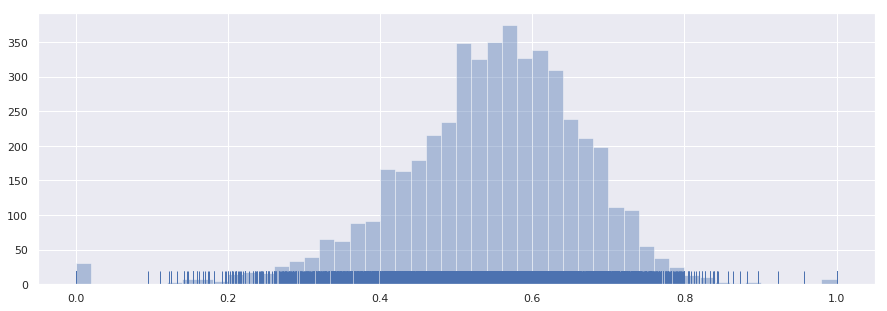

In [49]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(15,5)})
sb.distplot(h_recp, kde=False, rug=True)

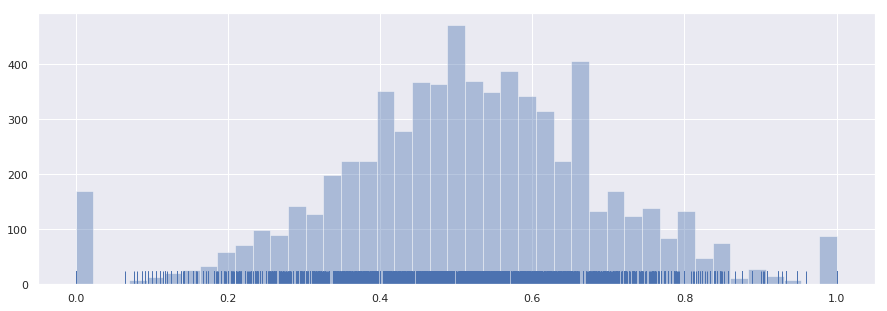

In [50]:
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(15,5)})
sb.distplot(l_recp, kde=False, rug=True)

In [51]:
import numpy as np
print np.mean(h_recp)

0.545314543787


In [52]:
print np.mean(l_recp)

0.513271035379
